# Missing value treatment

In [2]:
df_train = pd.read_csv("../../data/train.csv")

## 1. Electrical

** Electrical은 데이터 하나가 누락되어 있다. **

##### 결측값 분석

In [3]:
df_train[df_train["Electrical"].isnull()]["SalePrice"]

1379    167500
Name: SalePrice, dtype: int64

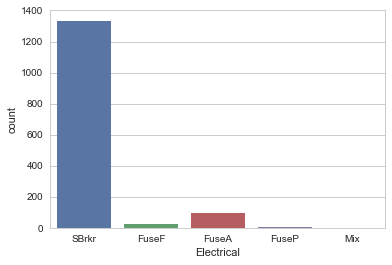

In [4]:
sns.countplot(df_train["Electrical"])

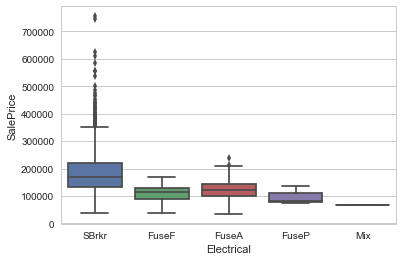

In [5]:
sns.boxplot(x = df_train["Electrical"], y = df_train["SalePrice"])

In [6]:
df_train.groupby(["Electrical"])["SalePrice"].agg(["mean", "std", "median", "max", "min"])

,mean,std,median,max,min
Electrical,,,,,
FuseA,122196.893617,37511.376615,121250,239000,34900
FuseF,107675.444444,30636.507376,115000,169500,39300
FuseP,97333.333333,34645.827070,82000,137000,73000
Mix,67000.000000,NaN,67000,67000,67000
SBrkr,186825.113193,79856.458326,170000,755000,37900


##### 처리 방안

Electrical 의 분포를 보면 91%가 SBrkr으로 대부분을 SBrkr를 차지하고 있으며, SBrkr의 SalePrice의 median값과 missing value의 SalePrice값이 비슷함으로 SBrkr로 대체한다.

## 2. Veneer

** 베니어가 없는 것이 8개 존재, 베니어가 없는 것도 정보이기 때문에 그대로 둔다. **

## 3. Basement

** 지하실이 없는 곳이 총 37개, 지하실이 없는 것도 정보이기 때문에 그대로 둔다. **

#### 1. 결측값 (BsmtFinType2)

In [9]:
df_train.loc[332][["BsmtCond", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1","BsmtFinType2", "BsmtFinSF2"]]

BsmtCond          TA
BsmtQual          Gd
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinSF1      1124
BsmtFinType2     NaN
BsmtFinSF2       479
Name: 332, dtype: object

BsmtFinSF2를 보면 넓이가 나와 있는 데 Type2에 없다고 잘못 입력

##### 결측값 분석

In [10]:
df_train.loc[332]["SalePrice"]

284000

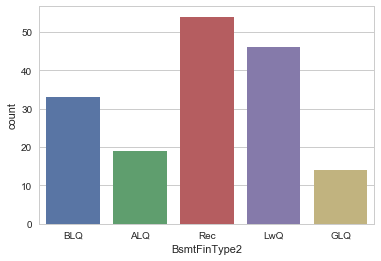

In [11]:
df_notUnf = df_train[df_train["BsmtFinType2"] != "Unf"]["BsmtFinType2"]
sns.countplot(df_notUnf)

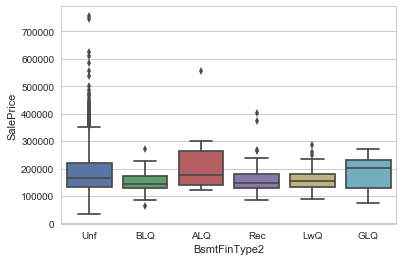

In [12]:
sns.boxplot(x = "BsmtFinType2", y = "SalePrice", data = df_train)

In [13]:
df_train.groupby(["BsmtFinType2"])["SalePrice"].agg(["mean", "std", "median", "max", "min"])

,mean,std,median,max,min
BsmtFinType2,,,,,
ALQ,209942.105263,104764.743411,174900,555000,123500
BLQ,151101.000000,41611.305388,143000,271900,62383
GLQ,180982.142857,64573.040359,203125,270000,75500
LwQ,164364.130435,43255.035241,154000,287000,88000
Rec,164917.129630,59183.277020,148750,402000,85000
Unf,184694.690287,81275.313909,167000,755000,34900


##### 처리 방안

categorical vlaue를 처리하는 방법으로는 KNN imputation과 최빈값을 넣는 방법이 존재한다. 하지만 KNN은 어려울 것 같고 최빈값은 Unf를 제외한 값을 보면 Rec와 LwQ가 비율이 다르기 때문에 그냥 단순히 제거한다

#### 2. 결측값 (BsmtExposure)

In [15]:
df_train.loc[948][["BsmtCond", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1","BsmtFinType2", "BsmtFinSF2"]]

BsmtCond         TA
BsmtQual         Gd
BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinSF1        0
BsmtFinType2    Unf
BsmtFinSF2        0
Name: 948, dtype: object

마감되지 않은 지하실이 존재하는 데 Exposure이 지하실이 없다고 잘못 입력

##### 결측값 분석

In [16]:
df_train.loc[948]["SalePrice"]

192500

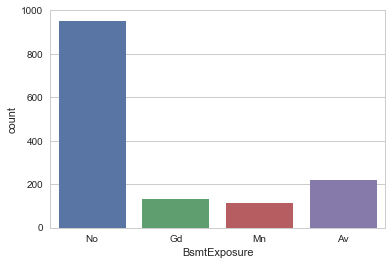

In [17]:
df_notNA = df_train[df_train["BsmtExposure"] != "NA"]["BsmtExposure"]
sns.countplot(df_notNA)

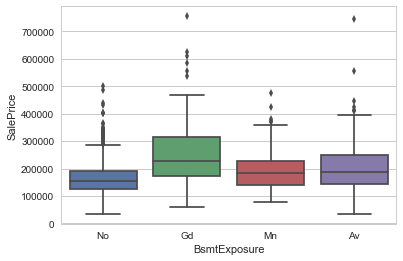

In [18]:
sns.boxplot(x = "BsmtExposure", y = "SalePrice", data = df_train)

In [19]:
df_train.groupby(["BsmtExposure"])["SalePrice"].agg(["mean", "std", "median", "max", "min"])

,mean,std,median,max,min
BsmtExposure,,,,,
Av,206643.420814,88655.504849,185850,745000,35311
Gd,257689.805970,118923.672583,226975,755000,61000
Mn,192789.657895,77335.442652,182450,475000,78000
No,165652.295908,60695.724915,154000,501837,34900


##### 결측값 처리 방안

BsmtExposure에서 NA를 제외한 값의 분포를 보면 대부분의 값이 No로 측정된다. 그러므로 결측값에 No를 입력한다. 혹은 해당 값을 삭제한다.